In [32]:
%matplotlib inline

In [ ]:
import pandas as pd
import seaborn as sns
import pylab as py
import arviz as ar

from pm_model import GLMBernoulli
from pm_model import TargetWeightedBeta, TargetWeightedDirichlet
from pm_model import FieldWeightedBeta, FieldWeightedDirichlet
from profiles import ProfileCollection
import utils

pd.set_option('display.max_columns', None)

In [2]:
profiles = ProfileCollection.load_dir('../../../data/profiles/')

In [8]:
try:
    df = pd.read_pickle('../../../data/profiles_processed.pkl')
except FileNotFoundError:
    df = utils.profiles_to_pairs_pandas(profiles)
    df.to_pickle('../../../data/profiles_processed.pkl')
    
targets = utils.TARGETS
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55463 entries, 0 to 60682
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   url             141 non-null    float64 
 1   has_identifier  21428 non-null  object  
 2   has_url         1400 non-null   object  
 3   has_country     44507 non-null  object  
 4   has_phone       2065 non-null   object  
 5   iban            14 non-null     float64 
 6   pair_weight     55463 non-null  float64 
 7   left_id         55463 non-null  object  
 8   name            54323 non-null  float64 
 9   has_date        24106 non-null  object  
 10  has_email       4799 non-null   object  
 11  pct_empty       55463 non-null  float64 
 12  user_weight     55463 non-null  float64 
 13  date            2564 non-null   float64 
 14  has_name        54326 non-null  object  
 15  email           368 non-null    float64 
 16  country         25604 non-null  float64 
 17  pct_full    

<AxesSubplot:xlabel='weight', ylabel='Count'>

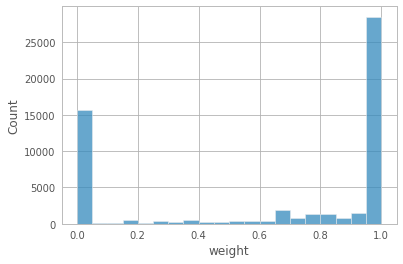

In [4]:
sns.histplot(df, x='weight')

<AxesSubplot:xlabel='judgement', ylabel='Count'>

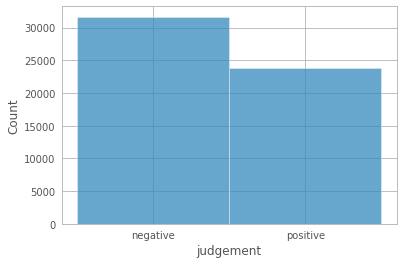

In [7]:
sns.histplot(df, x='judgement')

In [46]:
d = df.query('weight > 0.75').sample(frac=0.75)

models = {
    "glm_bernoulli": GLMBernoulli(d),
    "glm_bernoulli_pct": GLMBernoulli(d, targets + ['pct_full', 'pct_partial']),
    "target_w_beta": TargetWeightedBeta(d),
    "target_w_dirichlet": TargetWeightedDirichlet(d),
    "field_w_beta": FieldWeightedBeta(d),
    "field_w_dirichlet": FieldWeightedDirichlet(d),
}

In [47]:
for name, model in models.items():
    print("Sampling model:", model)
    model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.GLMBernoulli object at 0x7fbc1cddc3a0>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coef]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 437 seconds.
The acceptance probability does not match the target. It is 0.8874355774751448, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.GLMBernoulli object at 0x7fbbd4ce04c0>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coef]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 541 seconds.
The acceptance probability does not match the target. It is 0.8794500596381404, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.TargetWeightedBeta object at 0x7fbc060e5250>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coef]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 182 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sampling model: <pm_model.TargetWeightedDirichlet object at 0x7fbc06112940>


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coef]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 165 seconds.
The acceptance probability does not match the target. It is 0.6952605119520242, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Sampling model: <pm_model.FieldWeightedBeta object at 0x7fbbf71cea00>


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partial, coef]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 68 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling model: <pm_model.FieldWeightedDirichlet object at 0x7fbbf7369d90>


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_val

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: local_view_op
ERROR (theano.graph.opt): node: ViewOp(Elemwise{true_div,no_inplace}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 612, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason)
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/toolbox.py", line 543, in repla

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 104 seconds.
ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_no

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

ERROR (theano.graph.opt): Optimization failure due to: LocalOptGroup(local_useless_fill,local_useless_alloc,local_subtensor_make_vector,local_useless_elemwise,local_useless_inc_subtensor,local_useless_slice,local_subtensor_of_alloc,local_useless_inc_subtensor_alloc,local_useless_rebroadcast,local_join_1,local_join_empty,local_join_make_vector,local_useless_switch,local_useless_tile,local_useless_split,local_useless_reshape,local_useless_elemwise_comparison,local_useless_reduce,local_view_op,local_merge_alloc,local_useless_topk)
ERROR (theano.graph.opt): node: ViewOp(InplaceDimShuffle{0}.0)
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/theano/graph/opt.py", line 2060, in process_node
    fgraph.replace_all_validate_remove(repl_pairs, reason=lopt, remove=remove)
  File "/home/micha/wor

/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.


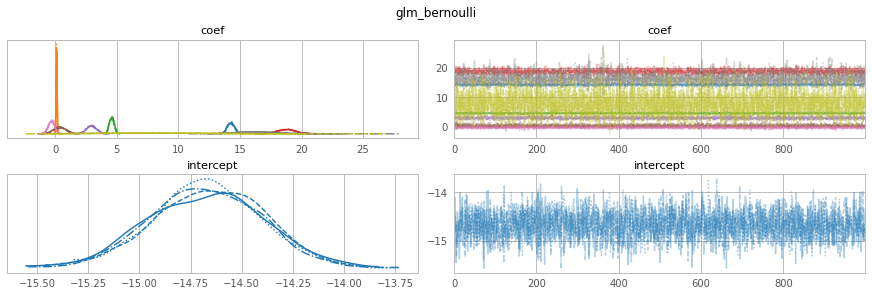

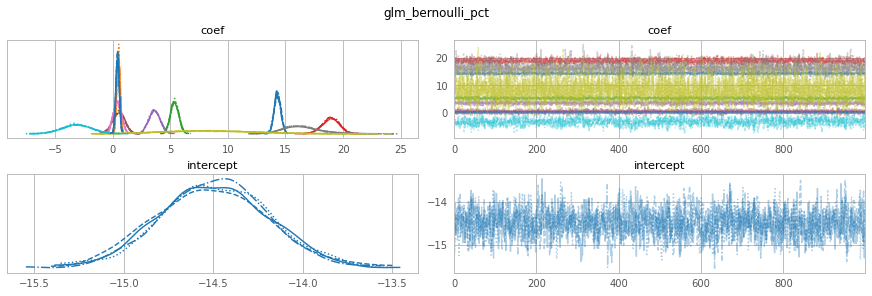

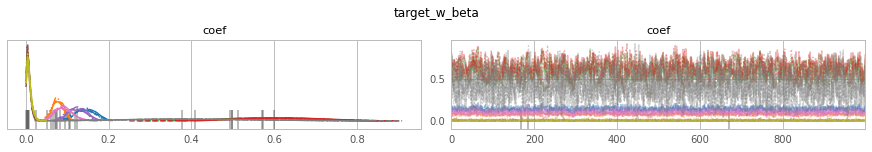

In [48]:
for ax, (name, model) in zip(axs, models.items()):
    ax = model.traceplot()
    py.suptitle(name)

/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/pm_model.py:109: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(score / norm, nan=0)
/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/venv/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:815: RuntimeWarning: invalid value encountered in true_divide
  precision = tps / (tps + fps)
/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/pm_model.py:109: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(score / norm, nan=0)
/home/micha/work/occrp/followthemoney-predict/experiments/xref-experiments/xref_experiments/experiments/profiles/pm_model.py:109: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(score / norm, nan=0)
/home/micha/work/occrp/followthemoney-p

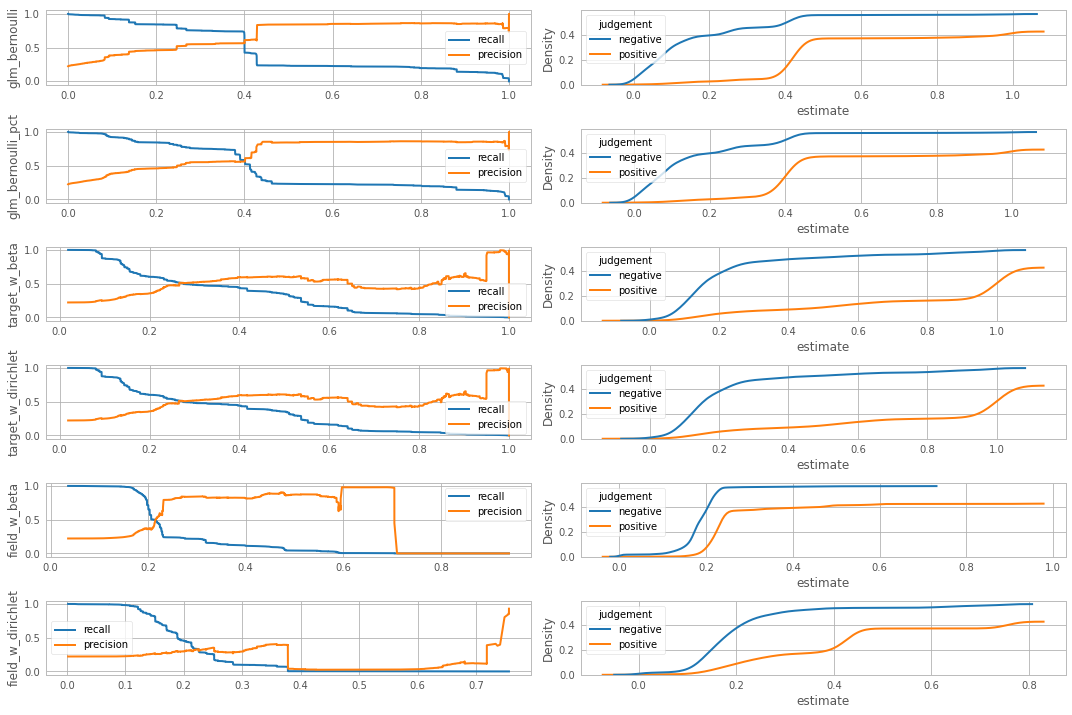

In [49]:
fig, axs = py.subplots(nrows=len(models), ncols=2, figsize = (15, 10))
for ax, (name, model) in zip(axs, models.items()):
    model.precision_recall_curve(df, ax=ax[0])
    model.estimate_distribution(df, ax=ax[1])
    ax[0].set_ylabel(name)
py.tight_layout()

In [ ]:
ar.compare({n:model._trace for n, model in models.items()})